### [Анализ данных в Pandas](https://www.youtube.com/watch?v=1Irng_IZV84&list=PLBRXq5Laddfy80vl9G9wpN4FoK9Ey43_M&index=9)

##### С данными в датасете всегда всё реально ПЛОХО!!! :)

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#
sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid")
print(os.path.abspath(os.curdir))

D:\!PROJ\pyWorkData\Karpov


In [2]:
retail = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Серия InvoiceNo
retail["InvoiceNo"]

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object

In [4]:
# Размер DataFrame
retail.shape

(541909, 8)

In [5]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
# название колонок
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
# строки
retail.index

RangeIndex(start=0, stop=541909, step=1)

#### Исследование данных 

In [8]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# отрицательная цена
retail[retail.UnitPrice < 0]
# Результат: битые стоки CustomerID - NaN и UnitPrice < 0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [10]:
# количество значений - NaN по колонкам
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
# записи с NaN в колонке CustomerID (retail.CustomerID.isna() -> True)
retail[retail.CustomerID.isna()]  # 135080 строк

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [51]:
# преобразование типа колонки InvoiceDate в тип data
retail["InvoiceDate"] = pd.to_datetime(retail["InvoiceDate"])

In [52]:
# CustomerID - номер пользователя, можно заменить NaN на 0
retail = retail.fillna({'CustomerID':0})
len(retail[retail.CustomerID == 0]) # смотри retail[retail.CustomerID.isna()] выше

132603

In [53]:
# теперь можно задать колонке 'CustomerID' тип  INT
retail = retail.astype({'CustomerID':'int'})
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [54]:
# цена == 0
retail[retail.UnitPrice == 0]
# Результат: 2515 сток

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [55]:
# отбросим строки с отрицательной и 0й ценой
retail = retail.query('UnitPrice > 0')
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [56]:
# сохраним копию данных в файл
# retail.to_csv("clean_retail_data.csv", index=False)

In [57]:
# TOP стран по количеству продаж -> сохраним результат
# retail.groupby("Country", as_index=False).agg({"CustomerID":'count'}) \
#     .sort_values("CustomerID", ascending=False) \
#     .to_csv("top_country.csv", index=False)
retail.groupby("Country", as_index=False).agg({"CustomerID":'count'}) \
    .sort_values("CustomerID", ascending=False).head()

,Country,CustomerID
36,United Kingdom,492979
14,Germany,9493
13,France,8556
10,EIRE,8192
31,Spain,2532


In [58]:
# TOP - уникальных покупателей по странам
retail[retail.CustomerID > 0].groupby("Country", as_index=False) \
    .agg({"CustomerID" : pd.Series.nunique}) \
    .sort_values("CustomerID", ascending=False).head()

,Country,CustomerID
35,United Kingdom,3949
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25


In [59]:
retail[retail.CustomerID > 0].groupby("Country", as_index=False) \
    .agg({"CustomerID" : pd.Series.nunique}) \
    .sort_values("CustomerID", ascending=False).CustomerID.sum()

4379

In [60]:
# 90 процентов зарегистрированных покупателей в United Kingdom
3949 / 4379 

0.9018040648549898

In [61]:
# выборка только по United Kingdom
UK_data = retail.query("Country == 'United Kingdom' & CustomerID > 0")
UK_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [62]:
# сколько транзакций на одного пользователя? (количество чеков InvoiceNo)
UK_data.groupby("CustomerID", as_index=False).agg({"InvoiceNo":"count"}) \
    .rename(columns={"InvoiceNo":"transactions"}) \
    .sort_values("transactions", ascending=False).transactions.median()

41.0

In [63]:
# визуализация1
transactions_data = UK_data.groupby("CustomerID", as_index=False) \
    .agg({"InvoiceNo":"count"}) \
    .rename(columns={"InvoiceNo":"transactions"}) \
    .sort_values("transactions", ascending=False)
transactions_data

,CustomerID,transactions
3620,17841,7983
908,14096,5128
2,12748,4641
1275,14606,2782
1782,15311,2491
...,...,...
3018,16990,1
2342,16078,1
2352,16093,1
267,13185,1


C:\Anaconda3\envs\bd_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transactions', ylabel='Density'>

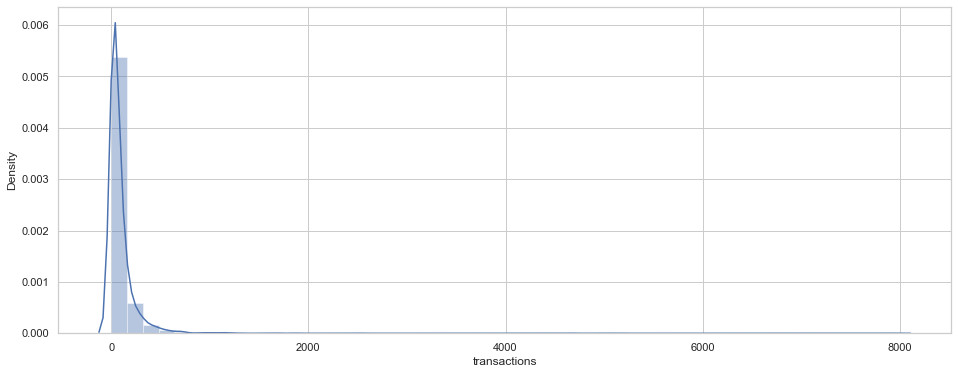

In [64]:
# визуализация 1
sns.distplot(transactions_data.transactions)

In [65]:
# визуализация 2 
transactions_data_all = UK_data.groupby("CustomerID", as_index=False) \
    .agg({"InvoiceNo":"count"}) \
    .rename(columns={"InvoiceNo":"transactions"}) \
    .sort_values("transactions", ascending=False)
transactions_data_all

,CustomerID,transactions
3620,17841,7983
908,14096,5128
2,12748,4641
1275,14606,2782
1782,15311,2491
...,...,...
3018,16990,1
2342,16078,1
2352,16093,1
267,13185,1


C:\Anaconda3\envs\bd_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transactions'>

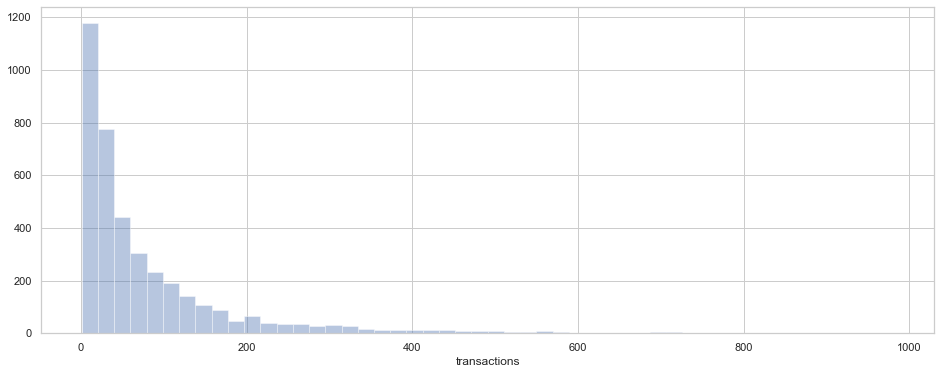

In [66]:
sns.distplot(transactions_data_all.query('transactions < 1000').transactions, kde=False)

##### Сколько пользователей по месяцам

In [67]:
UK_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [68]:
UK_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361854 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361854 non-null  object        
 1   StockCode    361854 non-null  object        
 2   Description  361854 non-null  object        
 3   Quantity     361854 non-null  int64         
 4   InvoiceDate  361854 non-null  datetime64[ns]
 5   UnitPrice    361854 non-null  float64       
 6   CustomerID   361854 non-null  int32         
 7   Country      361854 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 23.5+ MB


###### 1 решение

In [69]:
UK_data.InvoiceDate.dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541889    12
541890    12
541891    12
541892    12
541893    12
Name: InvoiceDate, Length: 361854, dtype: int64

In [72]:
# 1 делаем из InvoiceDate - индекс
UK_data.index = UK_data.InvoiceDate
UK_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [77]:
# группируем по дням, месяцам, годам и выводим количество уникальных пользователей 
# UK_data.resample("D").CustomerID.nunique()
# UK_data.resample("W").CustomerID.nunique()
UK_data.resample("M").CustomerID.nunique()
# UK_data.resample("Y").CustomerID.nunique()

InvoiceDate
2010-12-31     871
2011-01-31     684
2011-02-28     714
2011-03-31     923
2011-04-30     817
2011-05-31     985
2011-06-30     943
2011-07-31     899
2011-08-31     867
2011-09-30    1177
2011-10-31    1285
2011-11-30    1547
2011-12-31     617
Freq: M, Name: CustomerID, dtype: int64

<AxesSubplot:xlabel='InvoiceDate'>

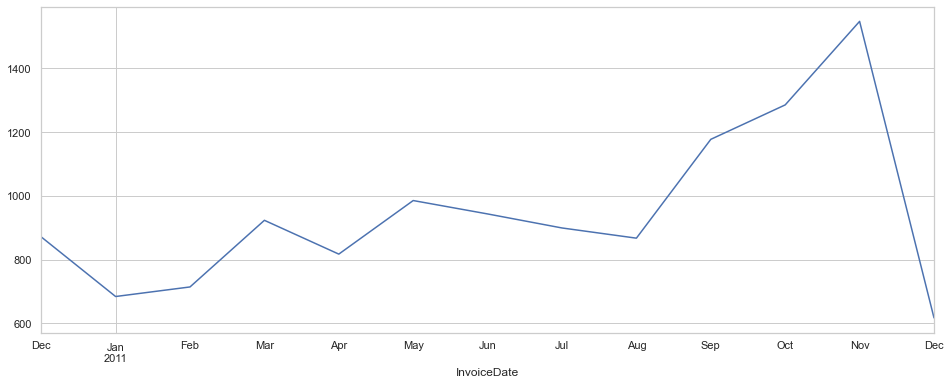

In [78]:
# группируем по дням, неделям, месяцам, годам и визуализируем количество уникальных пользователей 
# UK_data.resample("D").CustomerID.nunique().plot()
# UK_data.resample("W").CustomerID.nunique().plot()
UK_data.resample("M").CustomerID.nunique().plot()
# UK_data.resample("Y").CustomerID.nunique().plot()

###### Скользящее среднее

In [79]:
# сгруппированая выборка по дням
UK_data.resample("D").CustomerID.nunique()

InvoiceDate
2010-12-01     91
2010-12-02    113
2010-12-03     42
2010-12-04      0
2010-12-05     70
             ... 
2011-12-05    103
2011-12-06    115
2011-12-07     88
2011-12-08    111
2011-12-09     31
Freq: D, Name: CustomerID, Length: 374, dtype: int64

<AxesSubplot:xlabel='InvoiceDate'>

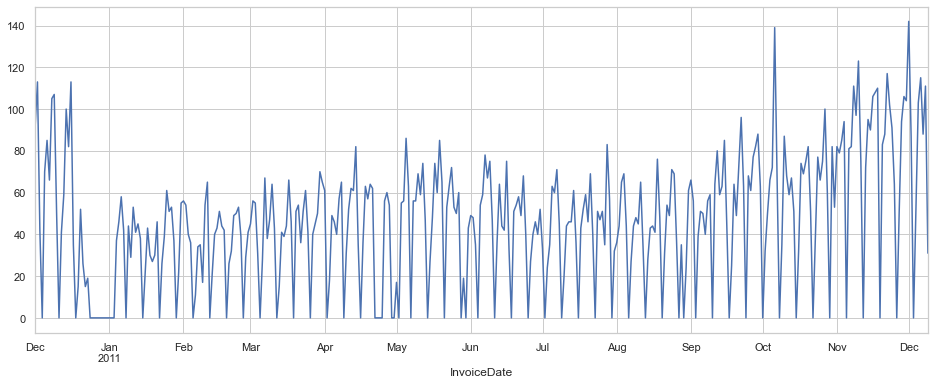

In [80]:
# оригинал
UK_data.resample("D").CustomerID.nunique().plot()

<AxesSubplot:xlabel='InvoiceDate'>

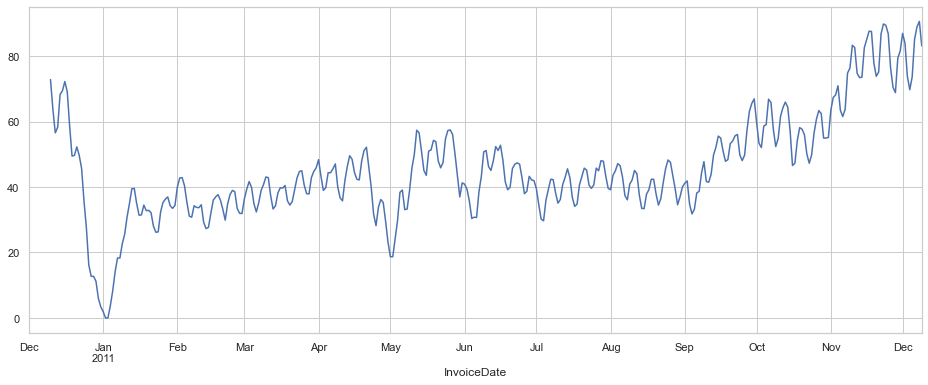

In [93]:
# скользящее среднее (усреднение по дням "D") размер окна 10
UK_data.resample("D").CustomerID.nunique().rolling(10).mean().plot()